In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
pd.set_option('display.max_columns', None)

### csv data preprocessing

In [2]:
data_df = pd.read_csv("data.csv")
data_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [3]:
data_dropped = data_df.drop("Unnamed: 32",axis=1)
data_dropped = data_dropped.drop("id",axis=1)

In [4]:
features_mean= list(data_dropped.columns[1:11])
features_se= list(data_dropped.columns[11:20])
features_worst=list(data_dropped.columns[21:31])
data_dropped.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data_dropped.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

In [6]:
data_dropped.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [7]:
data_dropped.shape

(569, 31)

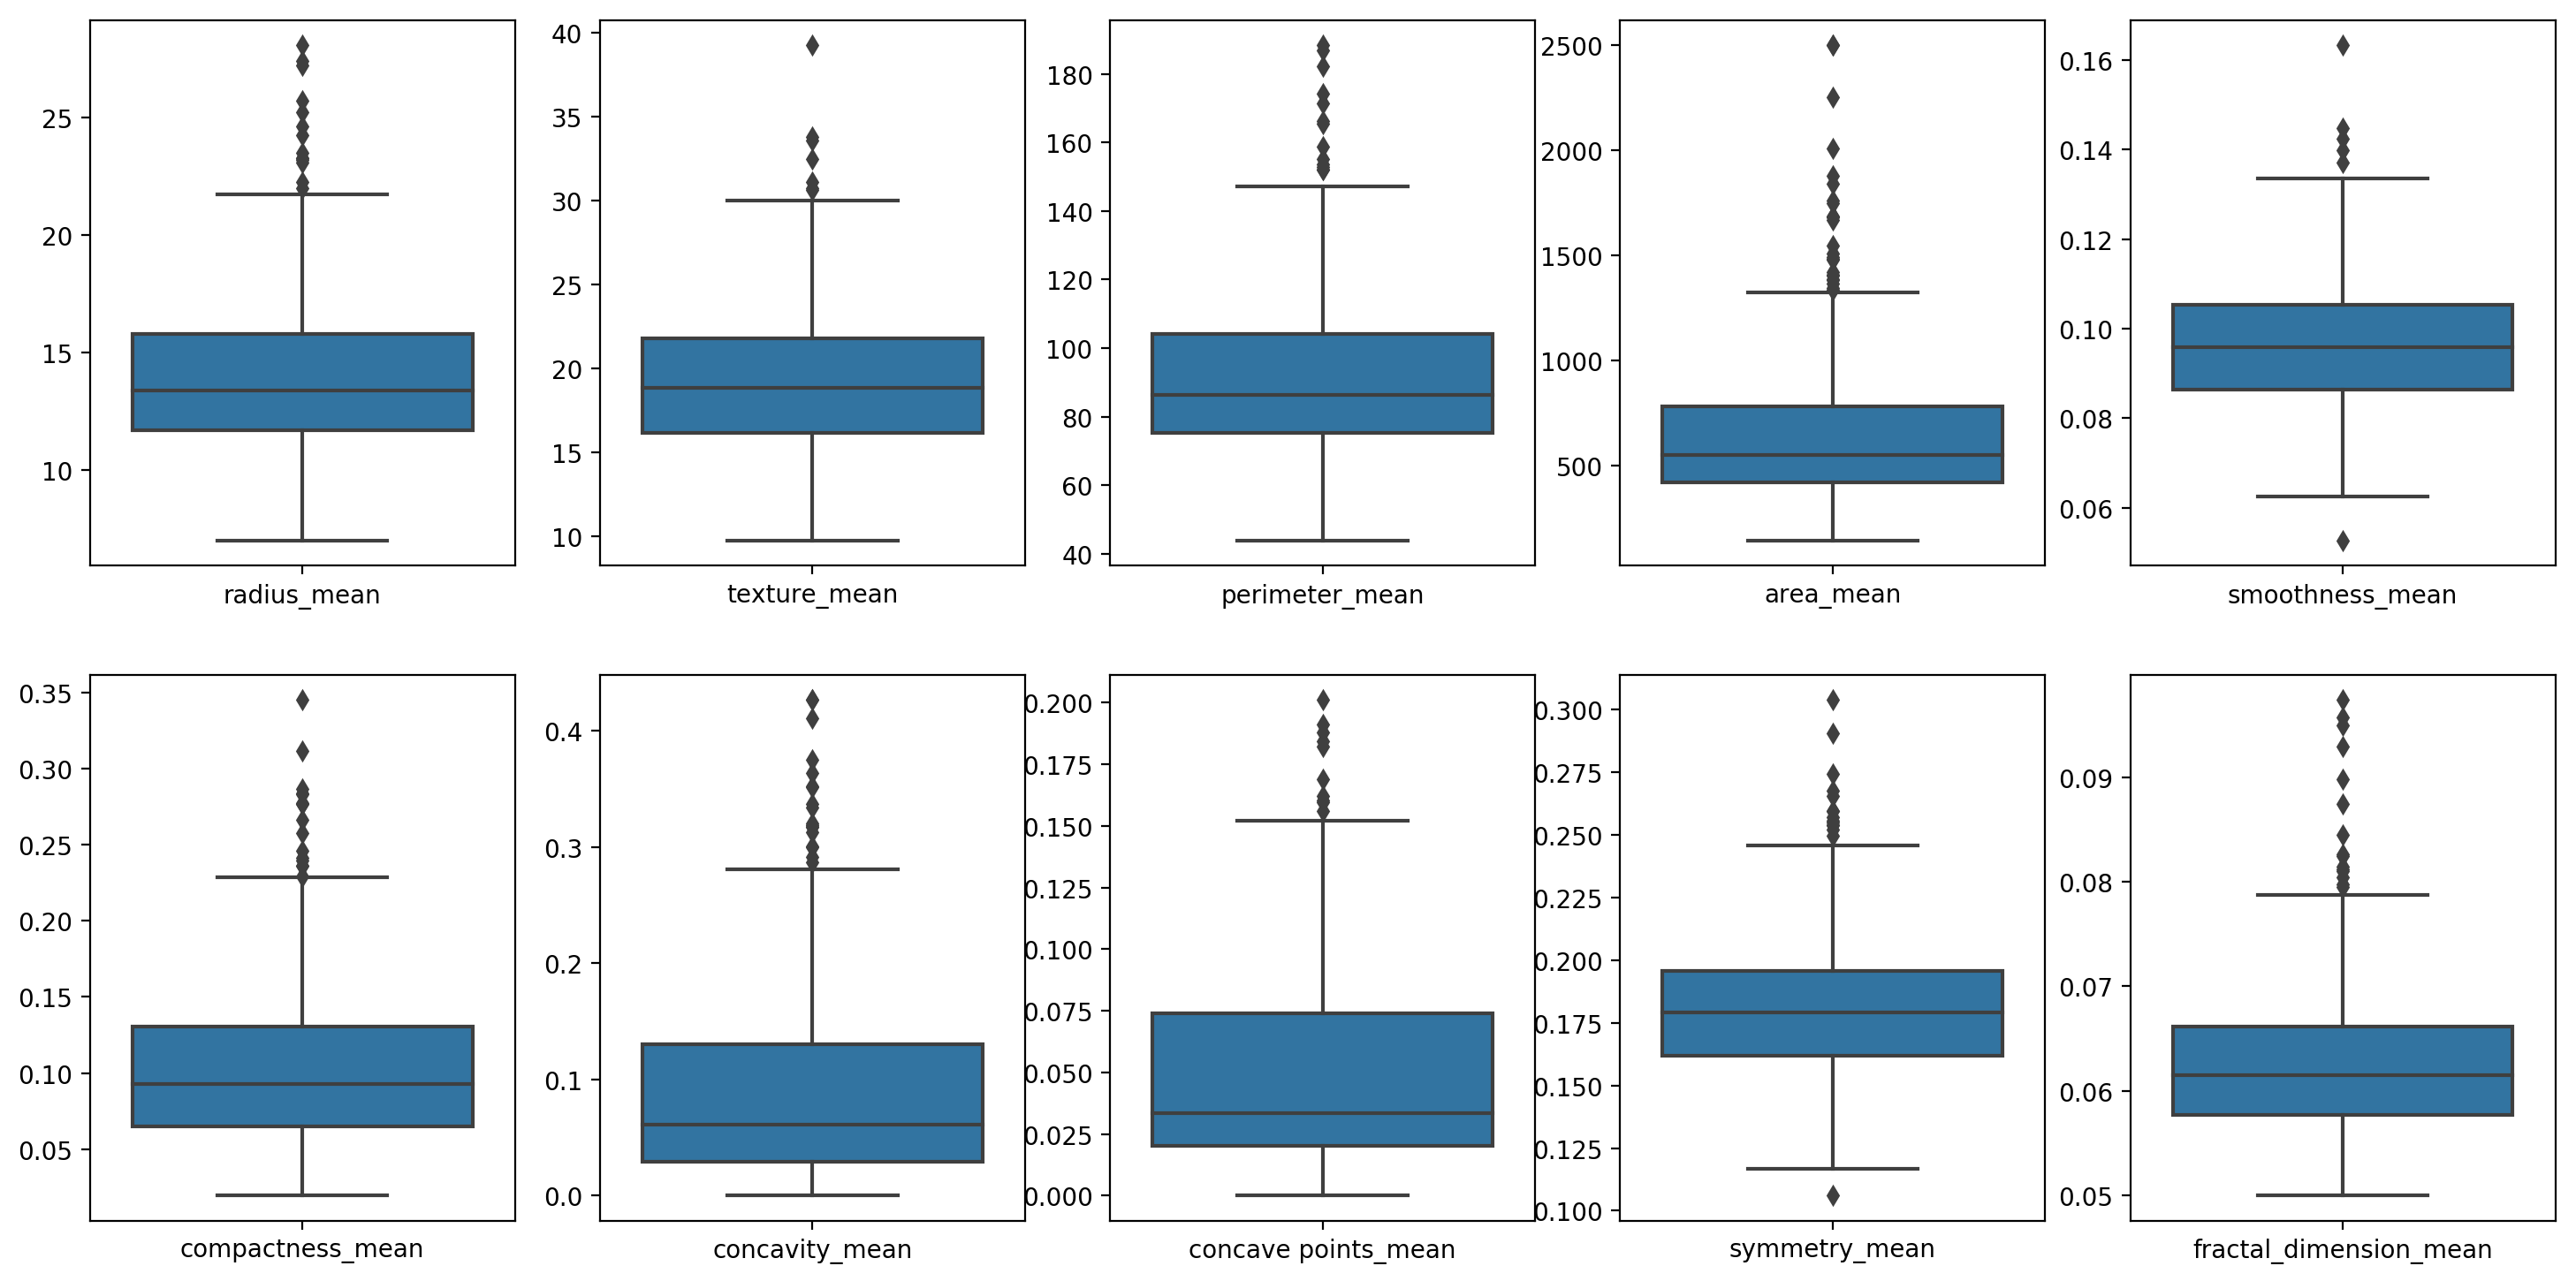

In [42]:
import seaborn as sns
fig = plt.figure(dpi=200, figsize=(18,9))
for i in range(0, 2):
    for j in range(0, 5):
        index = i*5 + j
        ax = fig.add_subplot(2, 5, index+1)
        sns.boxplot(data=data_dropped[features_mean].iloc[:,index].to_frame(),ax=ax)

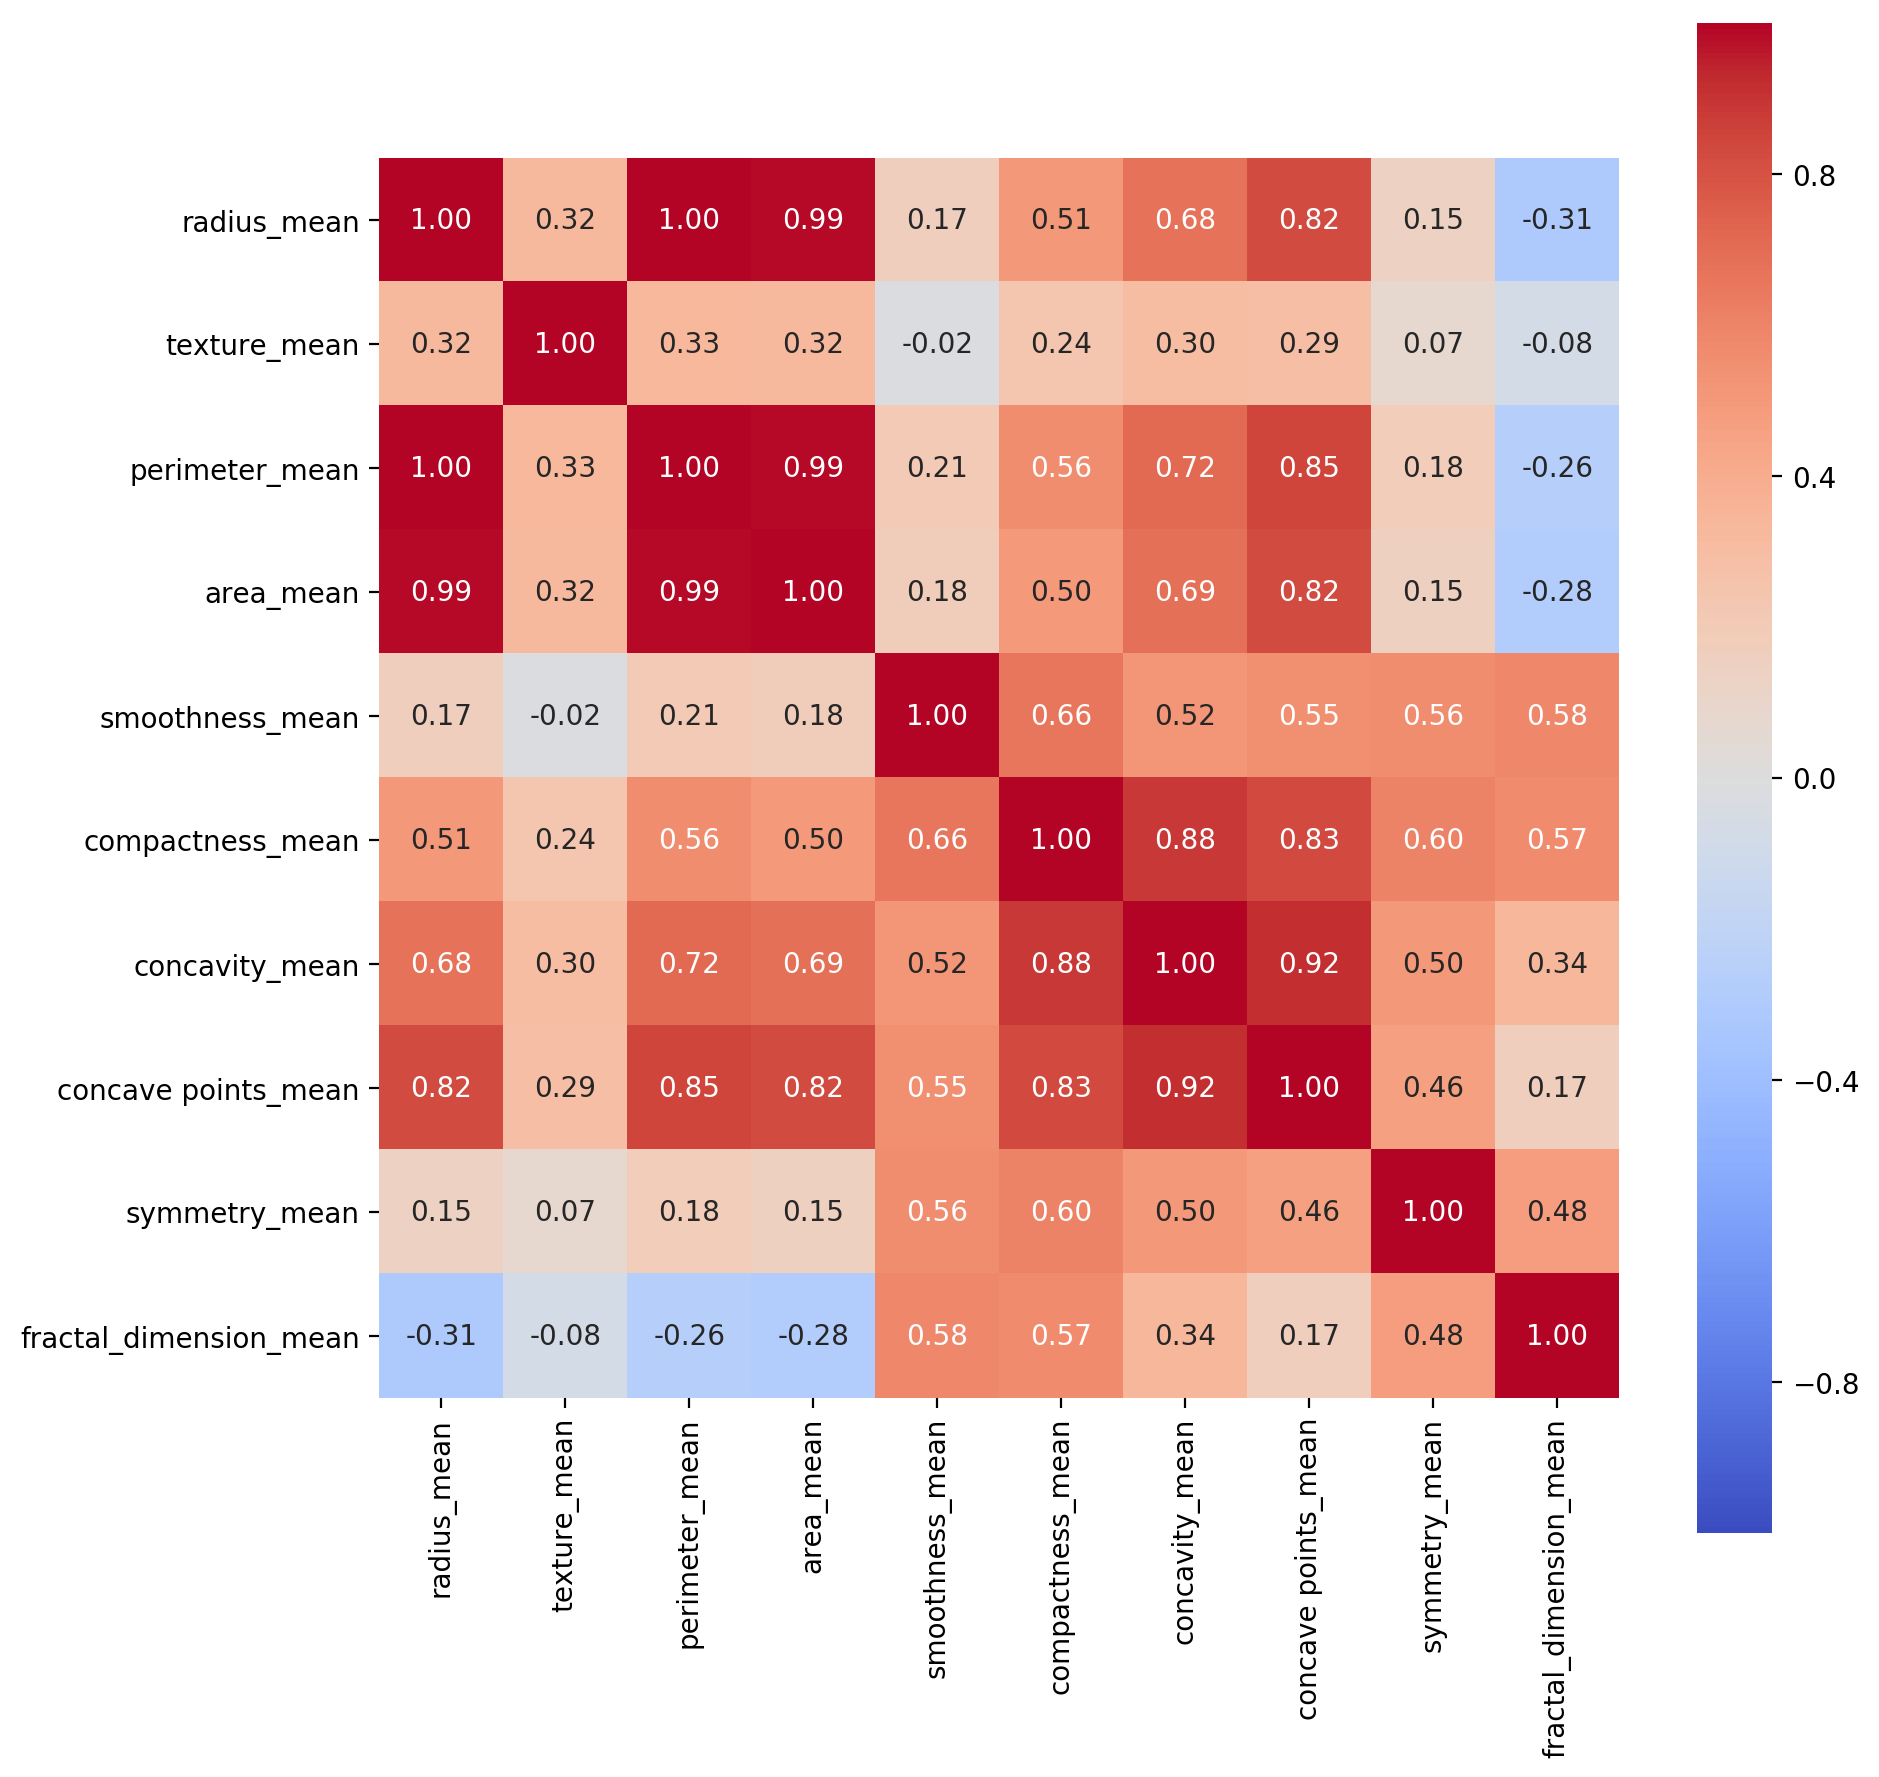

In [8]:
corr = data_dropped[features_mean].corr()
plt.figure(figsize=(10,10),dpi=200)
sns.heatmap(corr, vmin=-1, vmax=1, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

### sklearn data preprocessing

In [9]:
cancer = load_breast_cancer()

In [10]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [11]:
cancer.target[0]

0

In [12]:
sum(cancer.target==0)

212

In [13]:
data_m = cancer.data[cancer.target==0]
data_b = cancer.data[cancer.target==1]

In [14]:
X = cancer.data
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Data visualization

#### Pairwise Plot

/Users/alice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dfb77f0>,
      dtype=object)

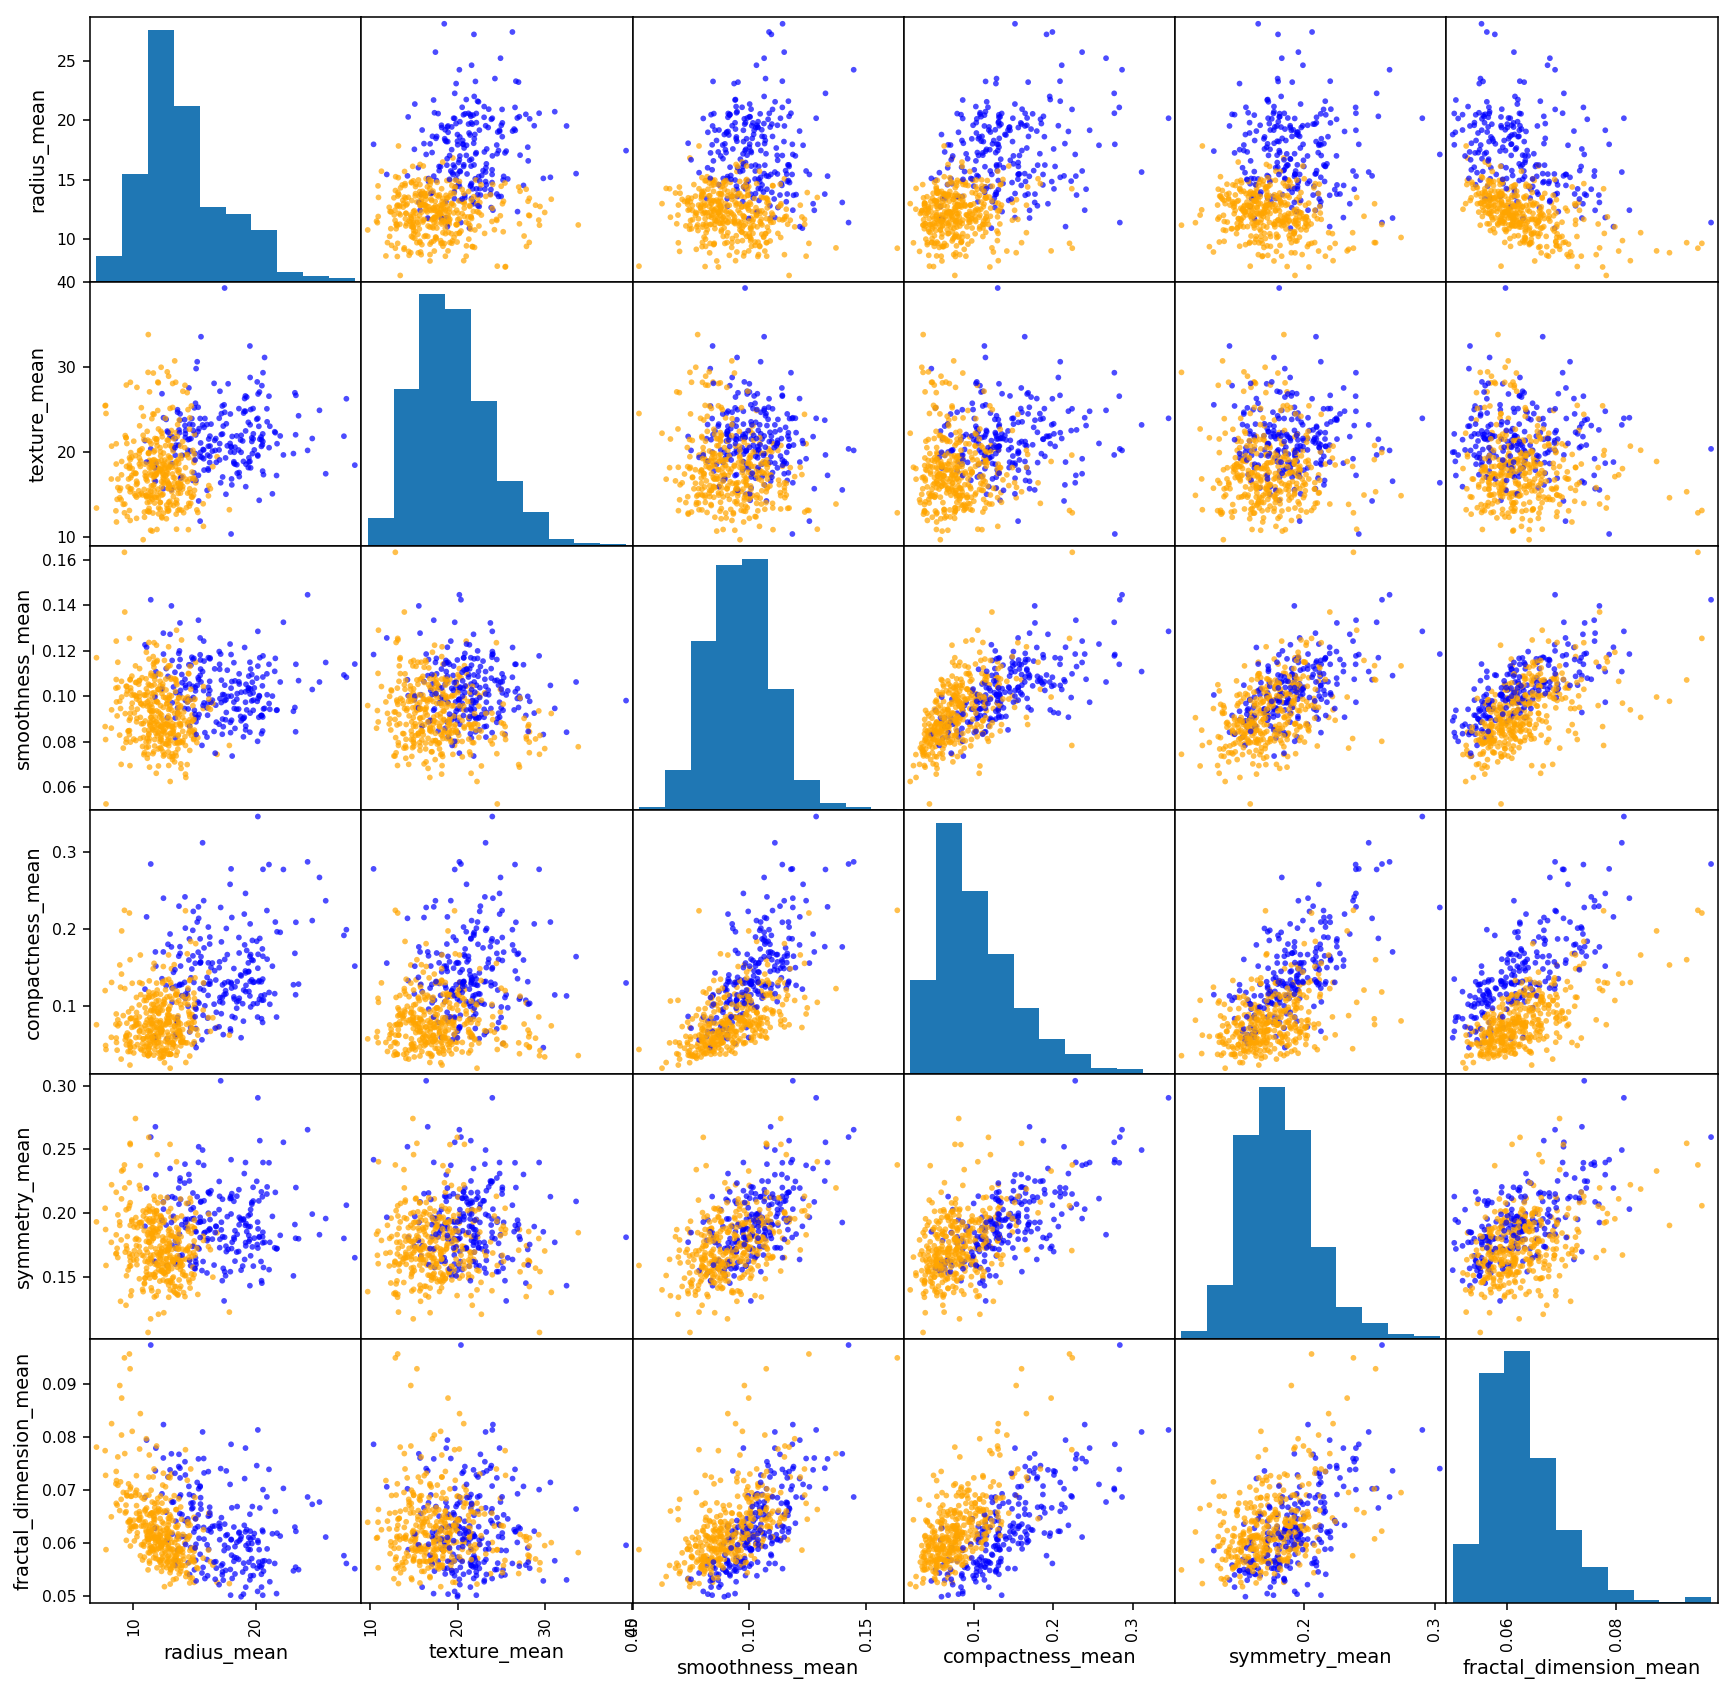

In [16]:
data_pairwise = data_dropped[['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']]
color_function = {'M': "blue", 'B': "orange"}
colors = data_dropped["diagnosis"].map(lambda x: color_function.get(x))
plt.rcParams["figure.dpi"] = 140
pd.scatter_matrix(data_pairwise, c=colors, alpha=0.7, figsize=(15,15), s=35)

#### PCA

In [17]:
pca = PCA()
X_reduced = pca.fit_transform(X_std)
X_reduced.shape

(569, 30)

In [18]:
var = pca.explained_variance_ratio_
var

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [19]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [20]:
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

In [21]:
x_label = ["PC%s" %i for i in range(1, 31)]
trace1 = go.Bar(
    x=x_label,
    y=list(var),
    name="Explained Variance")

trace2 = go.Scatter(
    x=x_label,
    y=cum_sum,
    name="Cumulative Variance")

layout = go.Layout(
    title='Explained variance',
    xaxis=dict(title='Principle Components', tickmode='linear'))

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

Text(0.5, 1.0, 'Explained Variance')

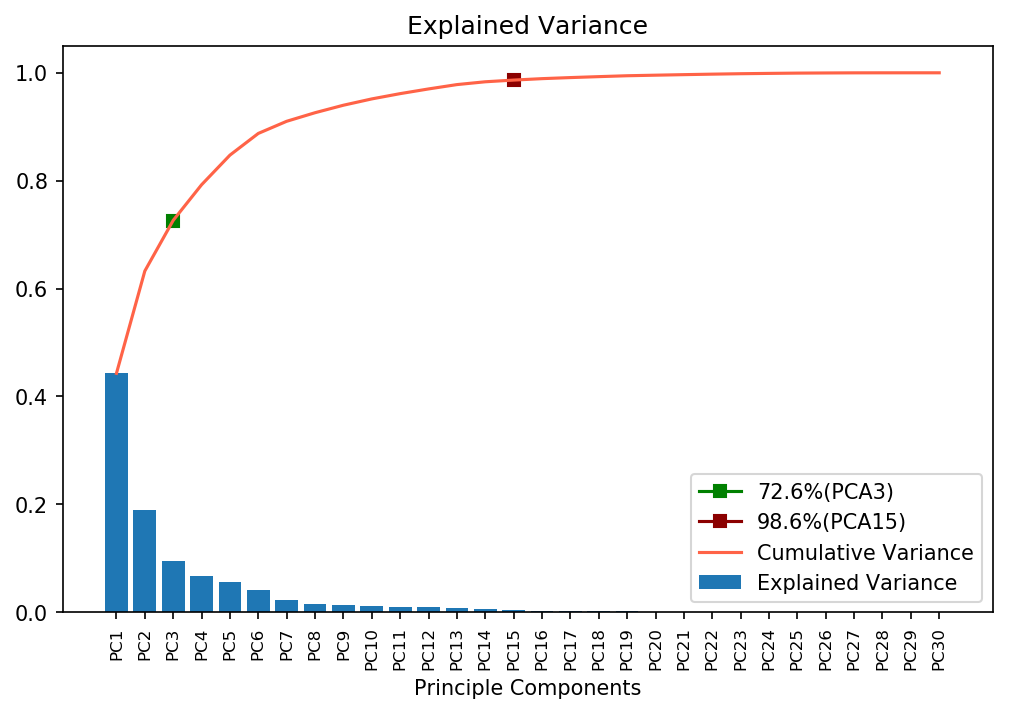

In [22]:
plt.figure(dpi=150, figsize=(8,5))
plt.plot(3, 0.726, marker='s', color='green', label='72.6%(PCA3)')
plt.plot(15, 0.986, marker='s', color='darkred', label='98.6%(PCA15)')
plt.plot(range(1, 31), cum_sum, color='tomato', label='Cumulative Variance')
plt.bar(range(1, 31), var, label='Explained Variance')
plt.legend()
plt.xlabel('Principle Components')
plt.xticks(range(1, 31), ('PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25', 'PC26','PC27', 'PC28','PC29', 'PC30'), rotation='vertical', fontsize=8)
plt.title('Explained Variance')

Text(0.5, 0.9, 'First Three PCA Visualization')

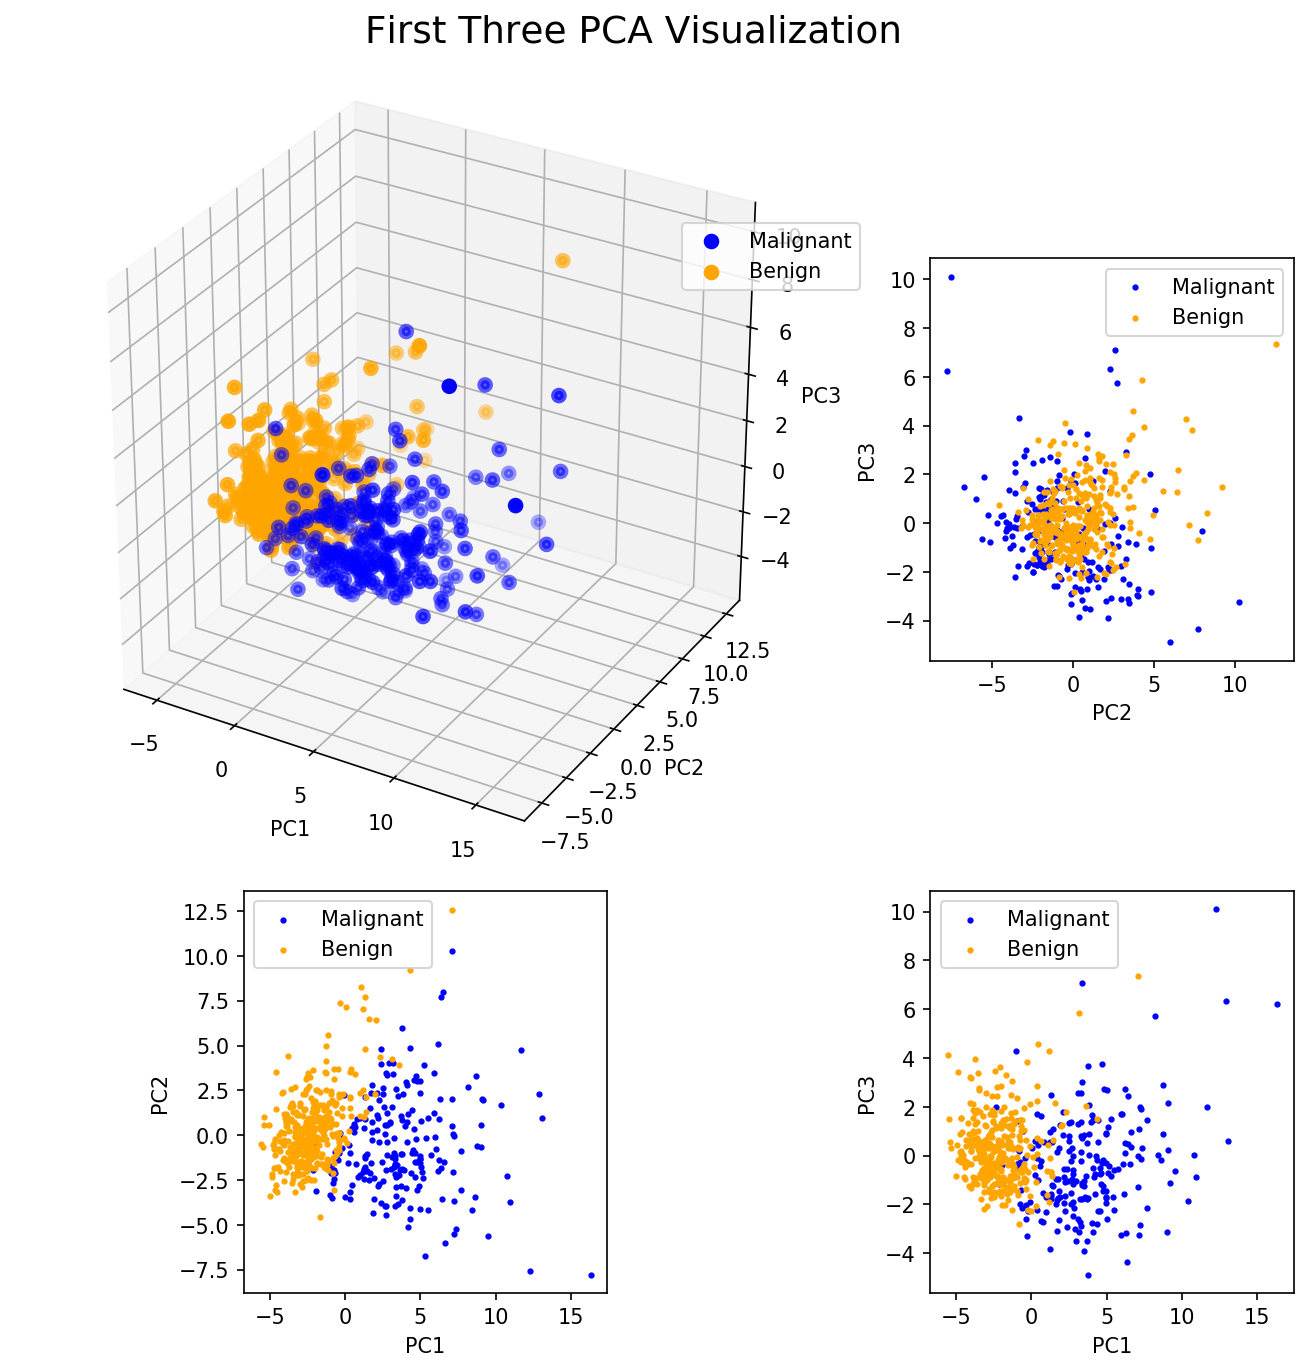

In [23]:
fig = plt.figure(dpi=150, figsize=(11,11))
grid = plt.GridSpec(6, 6, hspace=0.1, wspace=0.7)
ax1 = fig.add_subplot(grid[:4, :4], projection='3d')
ax1.scatter(X_reduced[cancer.target==0][:,0], X_reduced[cancer.target==0][:,1], X_reduced[cancer.target==0][:,2], c='b', linewidths=3, label='Malignant')
ax1.scatter(X_reduced[cancer.target==1][:,0], X_reduced[cancer.target==1][:,1], X_reduced[cancer.target==1][:,2], c='orange', linewidths=3, label='Benign')
ax1.legend(bbox_to_anchor=(0.8, 0.8))
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax2 = fig.add_subplot(grid[4:, 1:3])
ax2.scatter(X_reduced[cancer.target==0][:,0], X_reduced[cancer.target==0][:,1], c='b', s=4, label='Malignant')
ax2.scatter(X_reduced[cancer.target==1][:,0], X_reduced[cancer.target==1][:,1], c='orange', s=4, label='Benign')
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.legend()
ax3 = fig.add_subplot(grid[1:3, 4:])
ax3.scatter(X_reduced[cancer.target==0][:,1], X_reduced[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax3.scatter(X_reduced[cancer.target==1][:,1], X_reduced[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax3.set_xlabel("PC2")
ax3.set_ylabel("PC3")
ax3.legend()
ax4 = fig.add_subplot(grid[4:, 4:])
ax4.scatter(X_reduced[cancer.target==0][:,0], X_reduced[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax4.scatter(X_reduced[cancer.target==1][:,0], X_reduced[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax4.set_xlabel("PC1")
ax4.set_ylabel("PC3")
ax4.legend()
fig.suptitle("First Three PCA Visualization", y=0.9, fontsize=18)

#### TSNE

In [24]:
X_tsne2 = TSNE(n_components=2,random_state=0).fit_transform(X_std)

Text(0.5, 1.0, 'T-SNE Visualization')

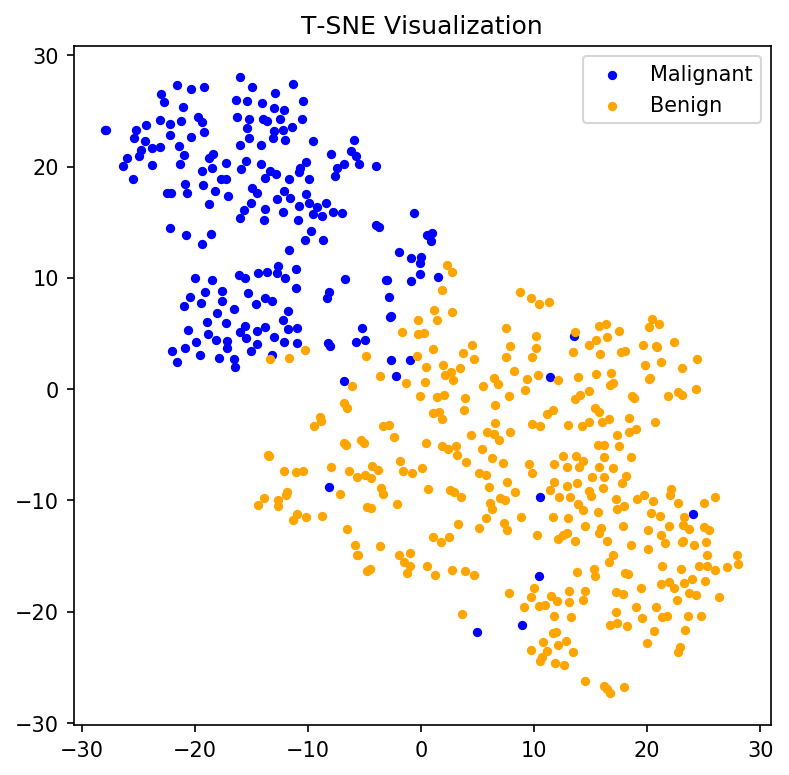

In [25]:
fig = plt.figure(dpi=150, figsize=(6,6))
plt.scatter(X_tsne2[cancer.target==0][:,0], X_tsne2[cancer.target==0][:,1], c='b', s=12, label='Malignant')
plt.scatter(X_tsne2[cancer.target==1][:,0], X_tsne2[cancer.target==1][:,1], c='orange', s=12, label='Benign')
plt.legend()
plt.title("T-SNE Visualization")

In [26]:
X_tsne = TSNE(n_components=3).fit_transform(X_std)
X_tsne.shape

(569, 3)

Text(0.5, 0.9, 'T-SNE Visualization')

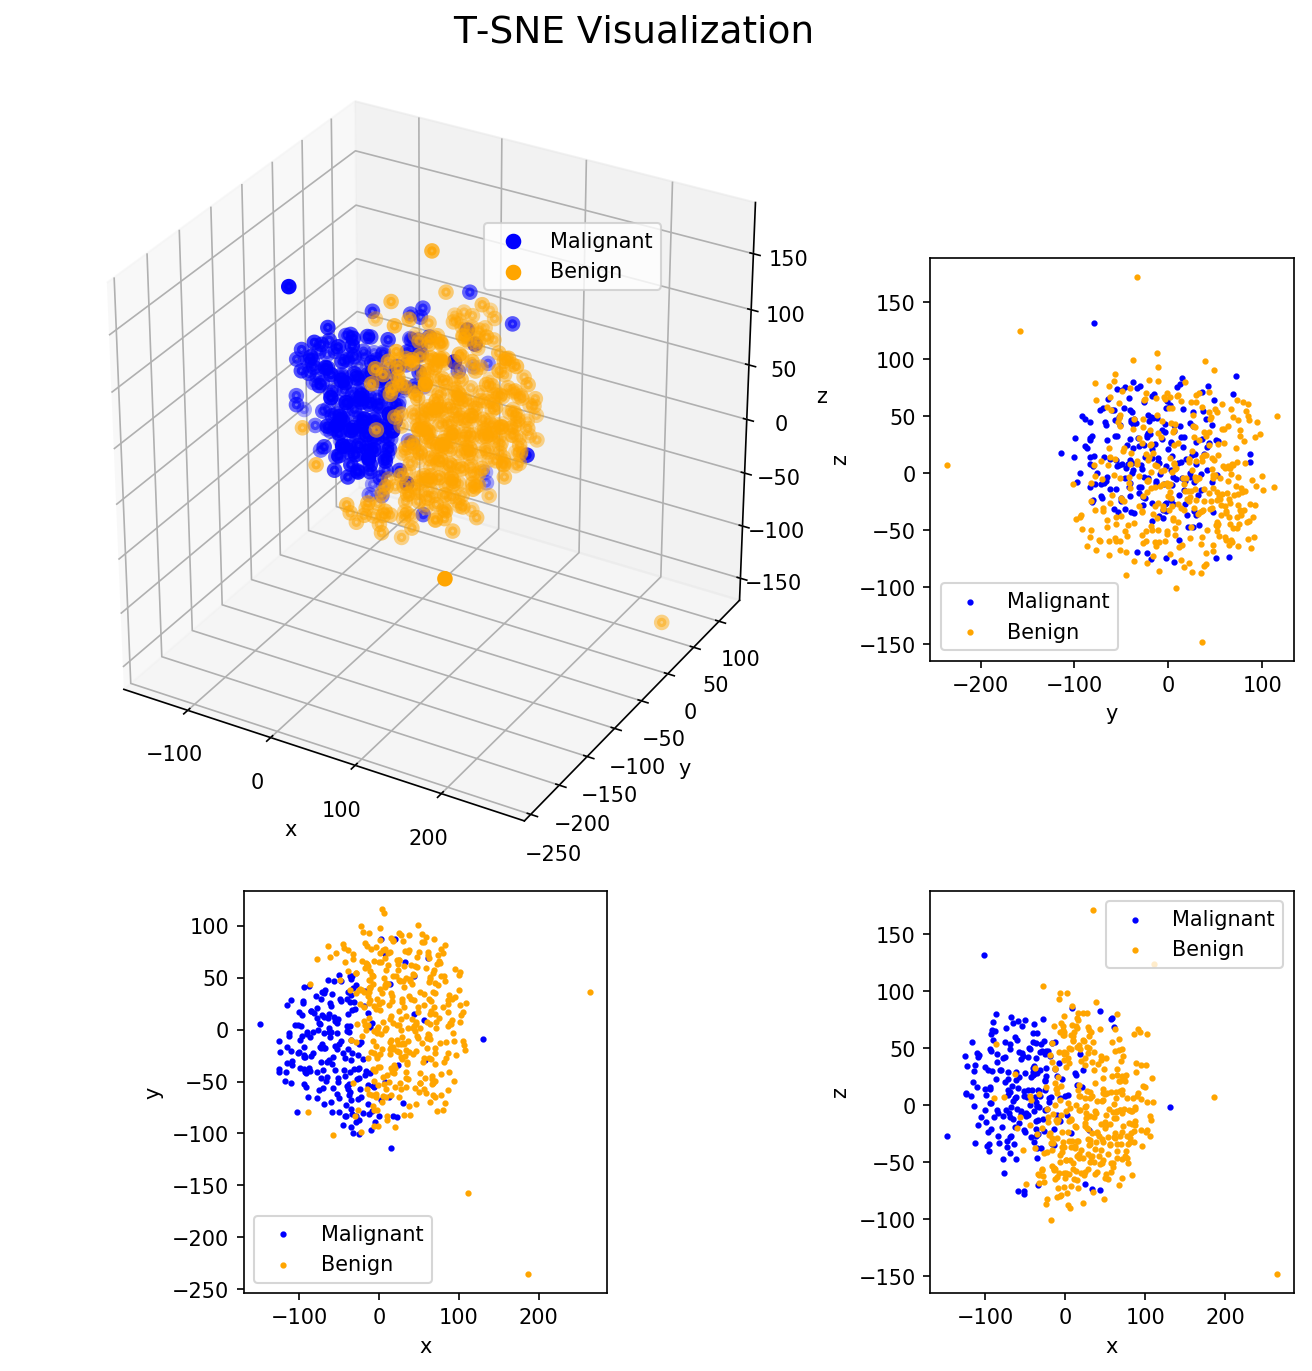

In [27]:
fig = plt.figure(dpi=150, figsize=(11,11))
grid = plt.GridSpec(6, 6, hspace=0.1, wspace=0.7)
ax1 = fig.add_subplot(grid[:4, :4], projection='3d')
ax1.scatter(X_tsne[cancer.target==0][:,0], X_tsne[cancer.target==0][:,1], X_tsne[cancer.target==0][:,2], c='b', linewidths=3, label='Malignant')
ax1.scatter(X_tsne[cancer.target==1][:,0], X_tsne[cancer.target==1][:,1], X_tsne[cancer.target==1][:,2], c='orange', linewidths=3, label='Benign')
ax1.legend(bbox_to_anchor=(0.8, 0.8))
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax2 = fig.add_subplot(grid[4:, 1:3])
ax2.scatter(X_tsne[cancer.target==0][:,0], X_tsne[cancer.target==0][:,1], c='b', s=4, label='Malignant')
ax2.scatter(X_tsne[cancer.target==1][:,0], X_tsne[cancer.target==1][:,1], c='orange', s=4, label='Benign')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()
ax3 = fig.add_subplot(grid[1:3, 4:])
ax3.scatter(X_tsne[cancer.target==0][:,1], X_tsne[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax3.scatter(X_tsne[cancer.target==1][:,1], X_tsne[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax3.set_xlabel("y")
ax3.set_ylabel("z")
ax3.legend()
ax4 = fig.add_subplot(grid[4:, 4:])
ax4.scatter(X_tsne[cancer.target==0][:,0], X_tsne[cancer.target==0][:,2], c='b', s=4, label='Malignant')
ax4.scatter(X_tsne[cancer.target==1][:,0], X_tsne[cancer.target==1][:,2], c='orange', s=4, label='Benign')
ax4.set_xlabel("x")
ax4.set_ylabel("z")
ax4.legend()
fig.suptitle("T-SNE Visualization", y=0.9, fontsize=18)

### Classifiers

### Incestuous Training and Testing

#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_std, y)
scores = clf_knn.predict_proba(X_std)[:,1]
clf_knn.score(X_std, y)

0.9736379613356766

Text(0.5, 1.0, 'Receiver Operating Characteristic')

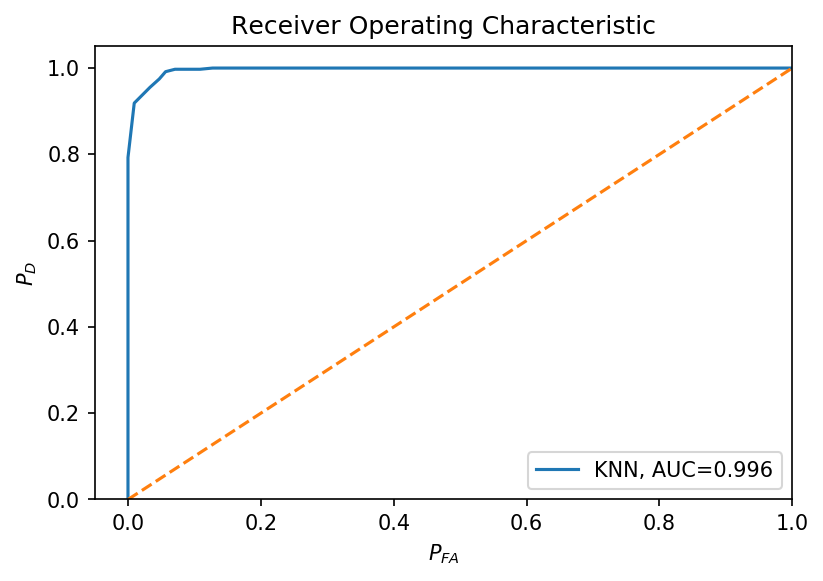

In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='KNN, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### Bayes Classifier

In [30]:
'''
mode1: the features may be dependent, and the covariance matrices are unique
mode2: features are independent but the covariance matrices under each class are unique
mode3: the covariance matrices under both classes are the same but the features may be dependent
mode4: covariance matrices under both classes are the same and the features are independent
'''
def trainBayesClassifier(data0, data1, mode):
    if mode=='ONE':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        cov0_hat = np.cov(data0.T)
        cov1_hat = np.cov(data1.T)
    if mode=='TWO':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        cov0_hat = np.array([[np.var(data0[:,0]),0],[0,np.var(data0[:,1])]])
        cov1_hat = np.array([[np.var(data1[:,0]),0],[0,np.var(data1[:,1])]])
    if mode=='THREE':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        data = np.concatenate(((data0 - mu0_hat),(data1 - mu1_hat)),axis=0)
        cov0_hat = np.cov(data.T)
        cov1_hat = np.cov(data.T)
    if mode=='FOUR':
        mu0_hat = np.mean(data0,axis=0)
        mu1_hat = np.mean(data1,axis=0)
        data = np.concatenate(((data0 - mu0_hat),(data1 - mu1_hat)),axis=0)
        cov0_hat = np.array([[np.var(data[:,0]),0],[0,np.var(data[:,1])]])
        cov1_hat = np.array([[np.var(data[:,0]),0],[0,np.var(data[:,1])]])
    W_0 = -1 / 2 * np.linalg.inv(cov0_hat)
    W_1 = -1 / 2 * np.linalg.inv(cov1_hat)
    w_0 = np.dot(np.linalg.inv(cov0_hat),mu0_hat)
    w_1 = np.dot(np.linalg.inv(cov1_hat),mu1_hat)
    w_00 = -1 / 2 * np.dot(np.dot(mu0_hat,np.linalg.inv(cov0_hat)),mu0_hat) - 1 / 2 * np.log(np.linalg.det(cov0_hat))
    w_10 = -1 / 2 * np.dot(np.dot(mu1_hat,np.linalg.inv(cov1_hat)),mu1_hat) - 1 / 2 * np.log(np.linalg.det(cov1_hat))
    return W_0, W_1, w_0, w_1, w_00, w_10

def runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, X_test):
    g0 = np.array([np.dot(np.dot(x_test,W_0),x_test) + np.dot(w_0,x_test) + w_00 for x_test in X_test])
    g1 = np.array([np.dot(np.dot(x_test,W_1),x_test) + np.dot(w_1,x_test) + w_10 for x_test in X_test])
    g = g1 - g0
    predict = g.copy()
    predict[predict>=0] = 1
    predict[predict<0] = 0
    return g, predict

Text(0.5, 1.0, 'Receiver Operating Characteristic')

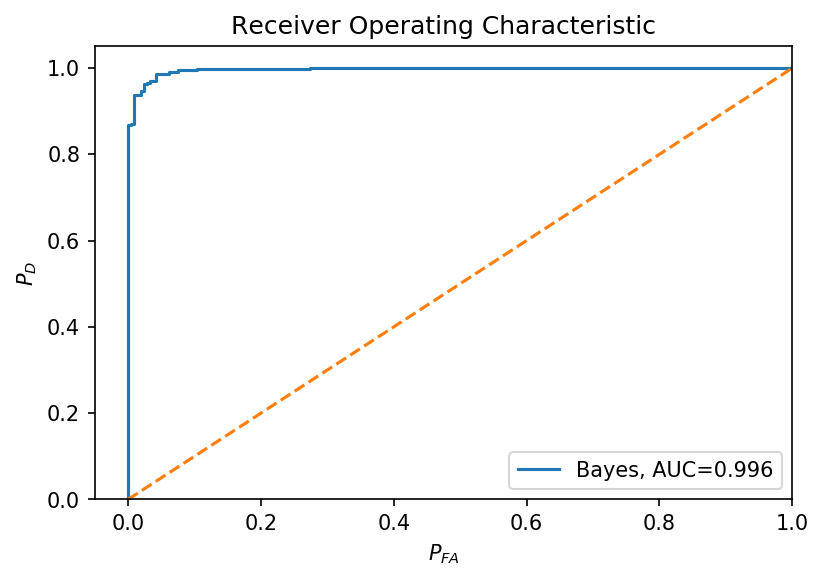

In [31]:
W_0, W_1, w_0, w_1, w_00, w_10 = trainBayesClassifier(data_m, data_b, 'ONE')
scores, predict = runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, X)
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='Bayes, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### LDA

In [32]:
def trainLDA(data0, data1):
    mu0 = np.mean(data0,axis=0)
    mu1 = np.mean(data1,axis=0)
    data = np.concatenate(((data0 - mu0),(data1 - mu1)),axis=0)
    cov = np.cov(data.T)
    w = np.dot(np.linalg.inv(cov), mu1-mu0)
    return w

def runLDA(w, X_test):
    lam = np.dot(X_test, w)
    predict = lam.copy()
    predict[predict>=0] = 1
    predict[predict<0] = 0
    return lam, predict

Text(0.5, 1.0, 'Receiver Operating Characteristic')

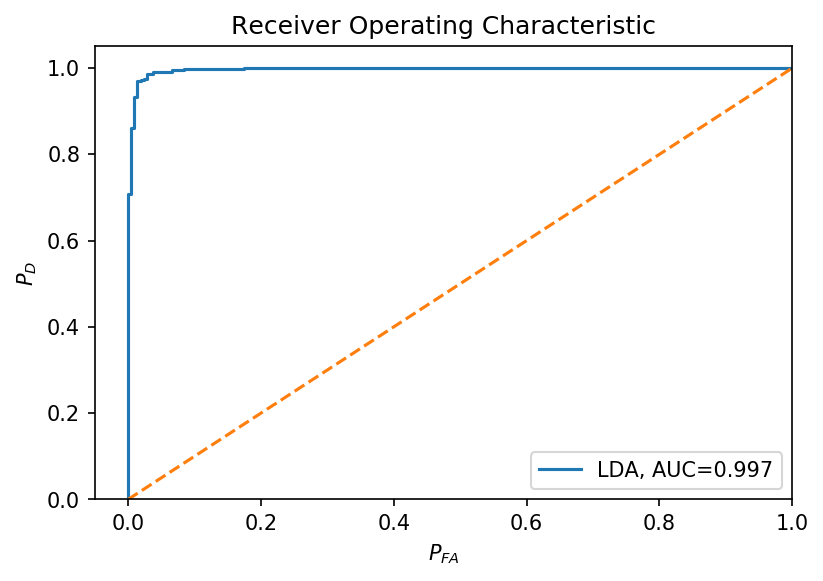

In [37]:
data0_std = X_std[y==0]
data1_std = X_std[y==1]
w = trainLDA(data0_std, data1_std)
scores, predict = runLDA(w, X_std)
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='LDA, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

In [36]:
predict.shape

(569,)

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e9, solver='newton-cg').fit(X_std,y)
scores = clf.predict_proba(X_std)[:,1]
clf.score(X_std, y)

1.0

Text(0.5, 1.0, 'Receiver Operating Characteristic')

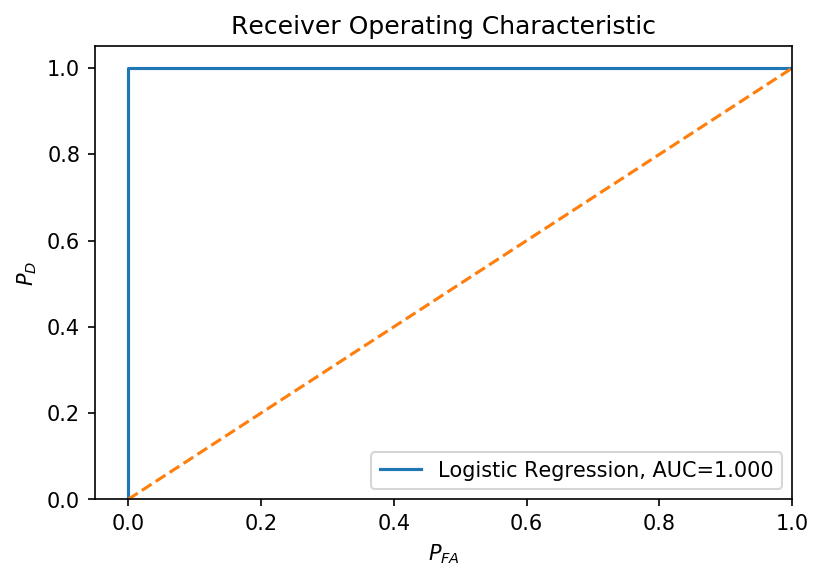

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='Logistic Regression, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### SVM

In [36]:
from sklearn.svm import SVC
clf_svm = SVC(C=10,gamma='auto').fit(X_std,y)
clf_svm.score(X_std, y)

0.9912126537785588

### Split Training and Testing

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

#### KNN

In [38]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train_std, y_train)
scores = clf_knn.predict_proba(X_test_std)[:,1]
clf_knn.score(X_test_std, y_test)

0.9438596491228071

Text(0.5, 1.0, 'Receiver Operating Characteristic')

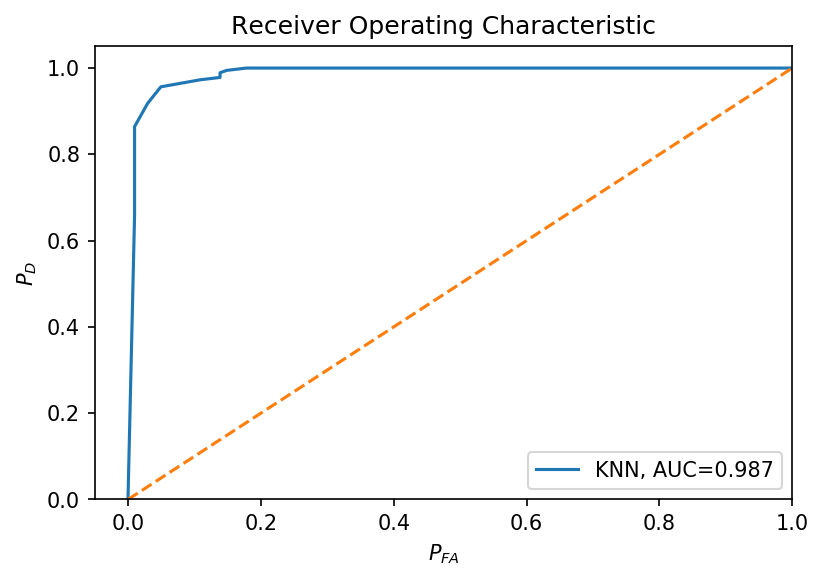

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='KNN, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### Bayes Classifier

Text(0.5, 1.0, 'Receiver Operating Characteristic')

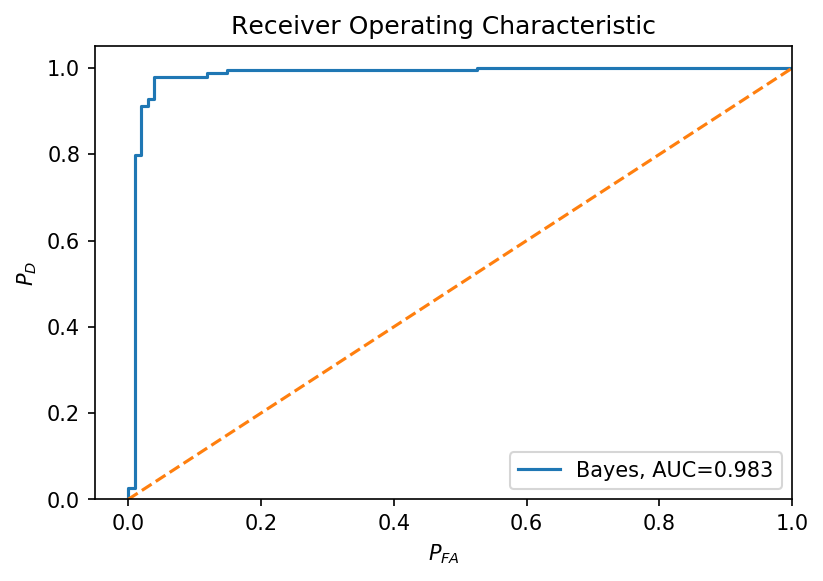

In [40]:
W_0, W_1, w_0, w_1, w_00, w_10 = trainBayesClassifier(X_train[y_train==0], X_train[y_train==1], 'ONE')
scores, predict = runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='Bayes, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### Logistic Regression

In [41]:
clf = LogisticRegression(C=1e9, solver='newton-cg').fit(X_train_std,y_train)
scores = clf.predict_proba(X_test_std)[:,1]
clf.score(X_test_std, y_test)

0.9333333333333333

Text(0.5, 1.0, 'Receiver Operating Characteristic')

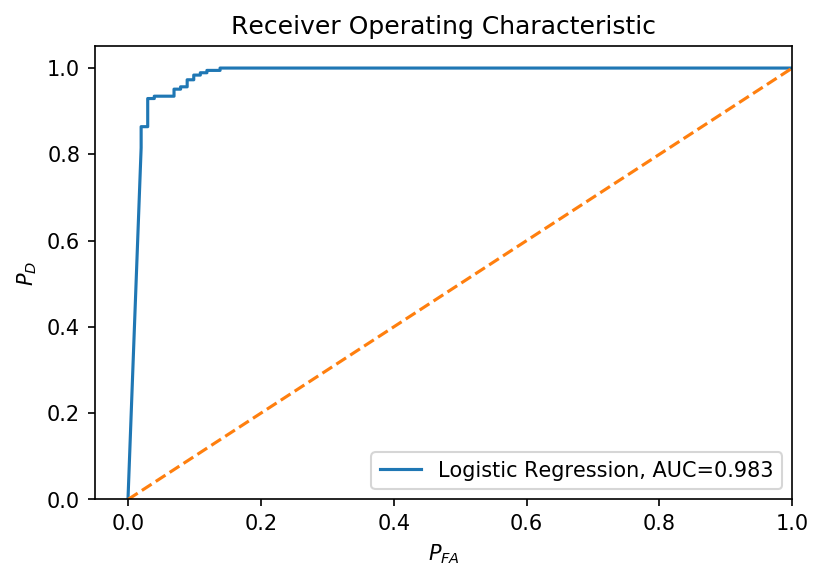

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='Logistic Regression, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### SVM

In [43]:
clf_svm = SVC(C=10,gamma='auto').fit(X_train_std,y_train)
clf_svm.score(X_test_std, y_test)

0.9614035087719298

### Cross Validation

In [44]:
from sklearn.model_selection import KFold
indices = np.arange(569)
kf = KFold(n_splits=5)

#### KNN

Text(0.5, 1.0, 'Receiver Operating Characteristic')

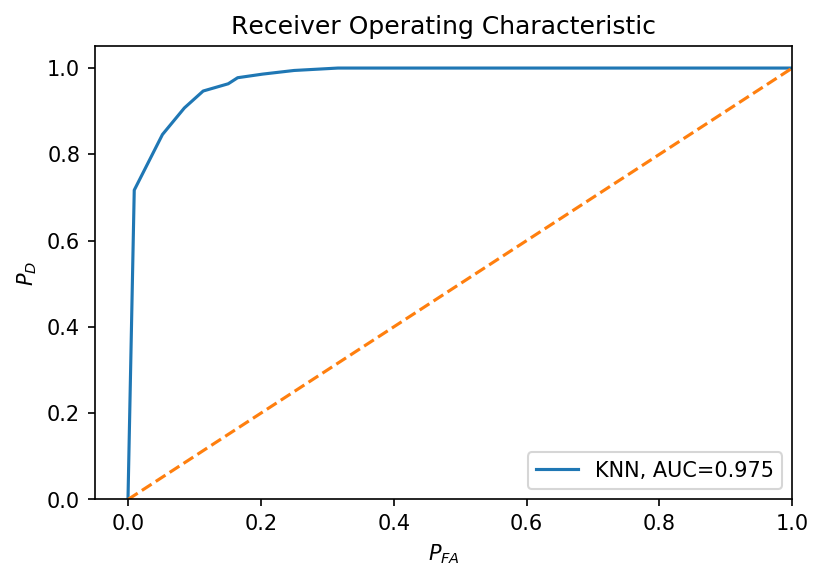

In [45]:
scores = np.array([])
for train, test in kf.split(indices):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    X_train_std = StandardScaler().fit_transform(X_train)
    X_test_std = StandardScaler().fit_transform(X_test)
    clf_knn = KNeighborsClassifier(n_neighbors=10)
    clf_knn.fit(X_train_std, y_train)
    scores_new = clf_knn.predict_proba(X_test_std)[:,1]
    scores = np.concatenate((scores, scores_new))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='KNN, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### Bayes Classifier

Text(0.5, 1.0, 'Receiver Operating Characteristic')

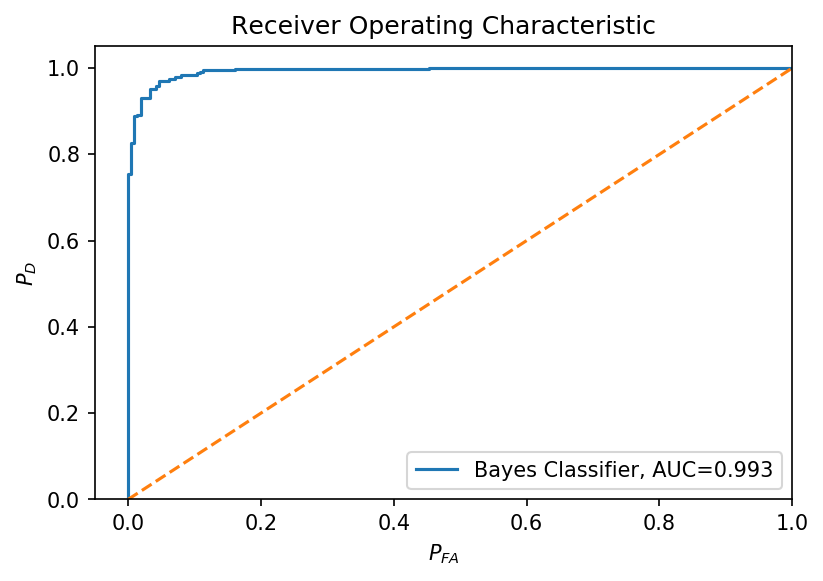

In [46]:
scores = np.array([])
for train, test in kf.split(indices):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    W_0, W_1, w_0, w_1, w_00, w_10 = trainBayesClassifier(X_train[y_train==0], X_train[y_train==1], 'ONE')
    scores_new, predict = runBayesClassifier(W_0, W_1, w_0, w_1, w_00, w_10, X_test)
    scores = np.concatenate((scores, scores_new))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='Bayes Classifier, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### Logistic Regression

Text(0.5, 1.0, 'Receiver Operating Characteristic')

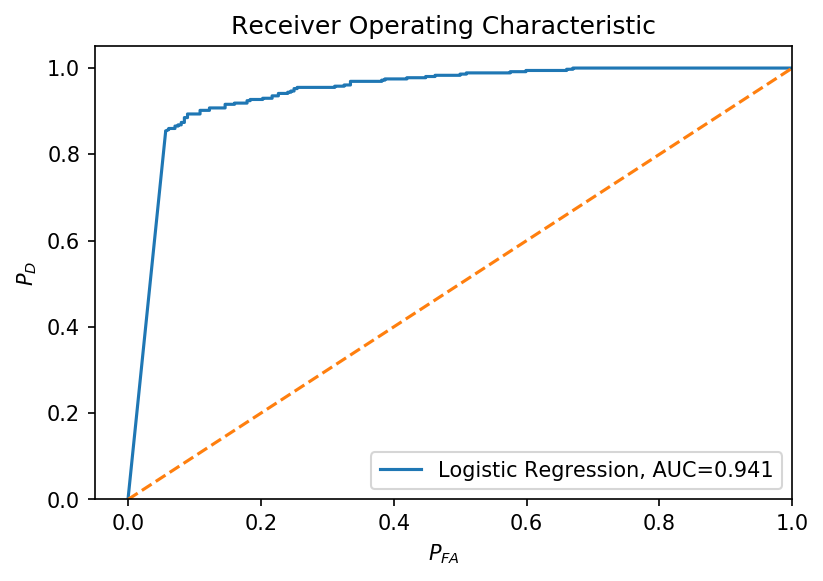

In [47]:
scores = np.array([])
for train, test in kf.split(indices):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    X_train_std = StandardScaler().fit_transform(X_train)
    X_test_std = StandardScaler().fit_transform(X_test)
    clf = LogisticRegression(C=1e9, solver='newton-cg').fit(X_train_std,y_train)
    scores_new = clf.predict_proba(X_test_std)[:,1]
    scores = np.concatenate((scores, scores_new))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, label='Logistic Regression, AUC=%.3f' %auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic')

#### SVM

In [48]:
score = np.array([])
for train, test in kf.split(indices):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    X_train_std = StandardScaler().fit_transform(X_train)
    X_test_std = StandardScaler().fit_transform(X_test)
    clf_svm = SVC(C=10,gamma='auto').fit(X_train_std,y_train)
    score_new = clf_svm.score(X_test_std, y_test)
    score = np.concatenate((score, [score_new]))
score

array([0.87719298, 0.96491228, 0.97368421, 0.93859649, 0.9380531 ])